In [ ]:
#Goal: to draw Julia set J(f) for f(z)=z^2+c
# J(f) is boundary of escaping set

In [1]:
# last time: matrix_plot of a grid of points 
import numpy 

In [4]:
a = numpy.zeros((4,4))
a

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [9]:
a[2,0]=1 # (2,0) would correspond to point at (0,2) in below
a[1,3]=1 
# if we want to color point at (x,y) black, set a[y,x]=1

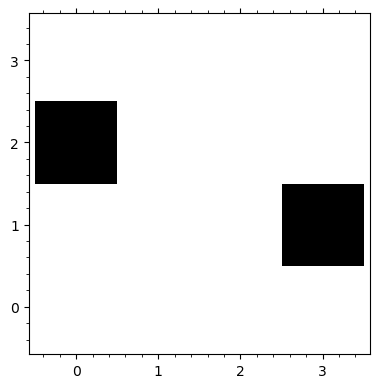

In [10]:
matrix_plot(a, origin='lower') # set origin to be at lower left

In [ ]:
# above represents {(0,2), (3,1)}

In [11]:
# Dealing with complex numbers. Use python complex numbers(for efficieny)
complex(1,3) # represents 1 + 3i; python uses j instead of i

(1+3j)

In [12]:
complex(0,1)^2

(-1+0j)

In [13]:
complex(1,1)^2 + complex(3,3) # arithmetic with complex numbers 

(3+5j)

In [14]:
abs(complex(3,4))

5.0

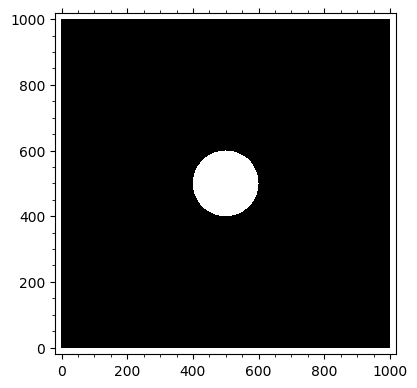

In [21]:
# Below is code to draw the outside of unit circle 
# (which we already know is the escaping set for f(z)=z^2)

# specify the grid that represents complex plane
width = 100
height = 100
xmin = -5.
xmax = 5.0
ymin = -5.0
ymax = 5.0

xinc = (xmax-xmin)/width #increment in x for each grid point
yinc = (ymax-ymin)/height #increment in y for each grid point

escape = numpy.zeros((height, width)) # array that will represent escaping set 
# value will be 1 for points that are in escaping set, 0 otherwise

for x in range(width):
    for y in range(height):
        # suppose that f(z)=z^2.  Know J(f) is unit circle, escape is everything outside circle
        # set escape[y,x]=1 if (x,y) outside unit circle
        c = complex(xmin + x*xinc, ymin + y*yinc)
        if abs(c)>1:
            escape[y,x]=1

matrix_plot(escape, origin='lower')

In [29]:
# Now: draw an escaping set that we don't already know
# specify the grid that represents complex plane
def julia(c, max_iter, width=400, height=400, xmin=-2, xmax=2, ymin=-2, ymax=2):
    """Draw Julia set for f(z)=z^2+c, in window where x ranges in (xmin,xmax),
    y ranges in (ymin,ymax), grid of size width x height.
    Test max_iter number iterates of f"""

    xinc = (xmax-xmin)/width #increment in x for each grid point
    yinc = (ymax-ymin)/height #increment in y for each grid point

    escape = numpy.zeros((height, width)) # array that will represent escaping set 
    # value will be 1 for points that are in escaping set, 0 otherwise

    for x in range(width):
        for y in range(height):
            z = complex(xmin + x*xinc, ymin + y*yinc)
            
            # set escape[y,x]=1 if z escapes ie |f(z)|,|f(f(z))|,... tend to infinity
            # Special thing about f(z)=z^2+c, any |c|<2: 
            # if |z|>2, |f^{\circ n}(z)|->infty, as n->infty
            # Upshot: for some z, if |f^{\circ n}(z)|>2, then z escapes, so set escape[y,x] = 1
            
            n=0 # which iterate we're currently on
            while n < max_iter: 
                # compute next iterate of f. At this stage z is the (n-1)th iterate
                z = z^2 + c # take next iterate i.e. replace z by f(z)
                n+=1 # increase our iterate count

                if abs(z)>2:
                    # know z escapes, by comments above
                    escape[y,x]=1 
                    break # breaks out of the containing loop 
            
    return matrix_plot(escape, origin='lower')

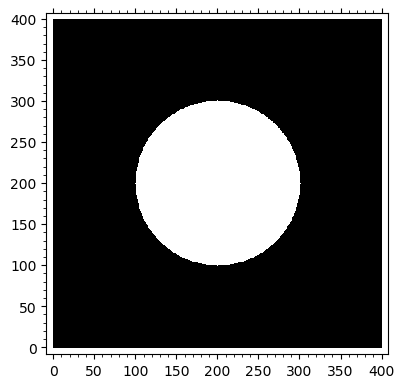

In [30]:
julia(complex(0,0), 20) # julia set for f(z)=z^2

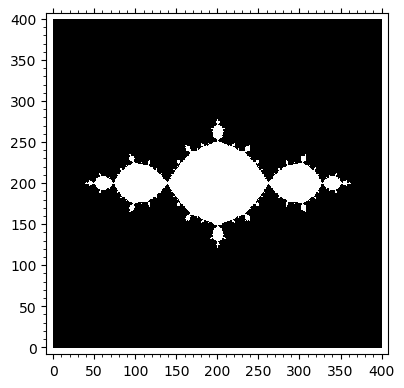

In [32]:
julia(complex(-1,0), 20) # julia set for f(z)=z^2-1
# "basillica" julia set 